In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten

In [5]:
mnist = tf.keras.datasets.mnist

In [6]:
mnist = mnist.load_data()

11501568/11490434 [==============================] - 46s 4us/step


In [10]:
(x_train,y_train),(x_test,y_test) = mnist

In [11]:
x_train.shape

(60000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
x_test.shape

(10000, 28, 28)

In [19]:
print(x_train[2])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

In [25]:
x_train = tf.keras.utils.normalize(x_train , axis =1)

x_test = tf.keras.utils.normalize(x_test , axis =1)

In [26]:
print(x_train[2])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

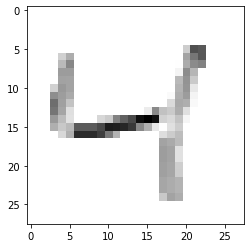

In [27]:
plt.imshow(x_train[2] , cmap = plt.cm.binary)
plt.show()

In [29]:
model = Sequential()

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])

In [33]:
model.fit(x_train,y_train,validation_data = (x_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0576 - accuracy: 0.9814 - val_loss: 0.0948 - val_accuracy: 0.9728
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.1078 - val_accuracy: 0.9703
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0335 - accuracy: 0.9887 - val_loss: 0.0988 - val_accuracy: 0.9710


In [38]:
model.save("mnist_model.h5")

In [41]:
classifier = load_model("mnist_model.h5")

In [43]:
predictions = classifier.predict([x_test])

In [45]:
print(predictions)

[[2.7181441e-11 8.1309037e-10 1.2045813e-06 ... 9.9999690e-01
  1.7960226e-10 5.2476863e-09]
 [3.4225708e-14 9.1124770e-07 9.9999905e-01 ... 6.4047048e-13
  1.4474186e-09 2.4070067e-20]
 [2.8092592e-10 9.9997449e-01 6.7837072e-07 ... 4.1181124e-06
  1.7441533e-05 5.5256088e-08]
 ...
 [4.8143090e-10 6.9889047e-08 3.2963270e-09 ... 9.5321238e-06
  5.9659976e-07 6.6417546e-05]
 [7.2931788e-10 1.3743973e-10 2.4865518e-11 ... 5.0684285e-10
  4.2646422e-04 2.9849281e-10]
 [3.4482372e-11 1.2700747e-08 1.8132977e-12 ... 2.9130601e-14
  1.4247691e-10 4.9263606e-14]]


In [60]:
print(np.argmax(predictions[1]))

2


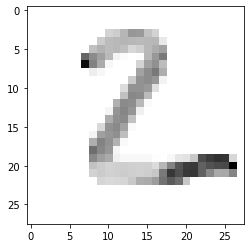

In [59]:
plt.imshow(x_test[1] , cmap = plt.cm.binary)
plt.show()